## PROJETO 2

<img src="diabetesimg.jpg"
     height="400">

## INTRODUÇÃO:

A diabetes é uma doença crônica caracterizada pelo aumento dos níveis de açúcar no sangue, o que pode provocar danos em vários órgãos, se não for tratado.

No mundo, os casos de diabetes em 2021 chegaram a 537 milhões de pessoas. No mesmo ano, 6,7 milhões de pessoas morreram em decorrência de complicações da doença, ou uma a cada cinco segundos. As projeções mostram que a situação tende a se agravar, com previsão de 643 milhões de casos até 2030, chegando em 2045 a 784 milhões.

Dentre esses 537 milhões de pessoas, aproximadamente 199 milhões são mulheres (37%), e só no Brasil são 8,5 milhões de brasileiras (7,8% da população).

Diante de tal problemática global, decidimos criar modelos que pudessem prever um diagnóstico, a partir de diversos fatores da paciente. 



Fontes: 

https://saude.estadao.com.br/noticias/geral,diabetes-doenca-silenciosa-avanca-em-todo-o-mundo-mas-pode-ser-prevenida-e-tratada,70004158121 |
https://www.tuasaude.com/diabetes/ |
https://mulheresediabetes.com.br/ 

## Base de dados e Dicionário das variáveis:

A base de dados foi extraída da plataforma [Kaggle](https://www.kaggle.com/datasets/whenamancodes/predict-diabities) intitulado “Predict Diabetes”, cujo objetivo principal é verificar se o paciente possui ou não diabetes baseado em alguns dados diagnósticos presentes no dataset.
Essa base de dados possui informações de 767 mulheres.

As variáveis apresentadas na base de dados `diabetes.xlsx` são:
 * `Pregnancies`: expressa o número de gravidez;
 * `Glucose`: expressa o nível de glicose no sangue;
 * `BloodPressure`: expressa a pressão sanguínea;
 * `SkinThickness`: expressa a espessura da pele;
 * `Insulin`: expressa o nível de Insulina no sangue;
 * `BMI`: expressa o índice de massa corporal;
 * `DiabetesPedigreeFunction`: expressa a porcentagem de Diabetes;
 * `Age`: expressa a idade;
 * `Outcome`: categorizado em [1, 0], respectivamente sim e não.

In [131]:
# Importando as bibliotecas necessárias para esta atividade
!pip install pandas-profiling
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from scipy import stats
from pandas_profiling import ProfileReport

from IPython.display import display

     |████████████████████████████████| 315 kB 437 kB/s eta 0:00:01
     |████████████████████████████████| 102 kB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 694 kB 753 kB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 6.8 MB/s eta 0:00:01     |█████████████████████▏          | 2.1 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 449 kB/s eta 0:00:01     |██▋                             | 788 kB 6.8 MB/s eta 0:00:02
     |████████████████████████████████| 4.7 MB 14.4 MB/s eta 0:00:01     |███▎                            | 481 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 8.3 MB/s  eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=80b78a4996ce641710c6d9020b6e34f2cdd8250038dc99310234c2e559e2107b
  Stored in directory: /Users/fabioneto/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe

In [132]:
# Importando biblioteca para Sistema Operacional
import os

In [113]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
/Users/fabioneto/Desktop/Ciencia_dados/22-2b-cd-p2-p2_gustavo_fabio_vini_yuri



In [114]:
filename = 'diabetes.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo diabetes.xlsx está na mesma pasta do notebook, yay!


In [115]:
dados = pd.read_excel('diabetes.xlsx')
dados

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Analise exploratória:

In [116]:
dados.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [117]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
dados.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [153]:
x=0
lista=[]
for i in dados['Insulin']:
    if i==0:
        lista.append(x)
        x+=1
    else:
        x+=1

dados.drop(lista,axis=0, inplace=True)

len(dados['Pregnancies'])
print(dados['Pregnancies'])

3       1
4       0
6       3
8       2
13      1
       ..
753     0
755     1
760     2
763    10
765     5
Name: Pregnancies, Length: 394, dtype: int64


In [159]:
dados.reindex(list(np.arange(0,394)))
dados


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
13                      0.398   59        1  
..                        ...  ...      ...  
753                     0.222   26        1  
755                     1.057   37        1  
760                     0.766   22        0  
763                     0.171   63        0  
765                     0.245   30        0  

[394 rows x 9 columns]

In [135]:
dados.corr().style.background_gradient(cmap = 'Blues')

<AxesSubplot:>

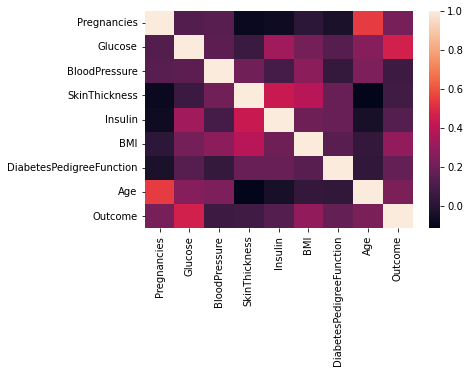

In [136]:
sns.heatmap(dados.corr())

In [137]:
fig, ax = plt.subplots(figsize=(12,8))
_ = sns.heatmap(dados.corr(), cmap = 'Greens', linewidth = 0.5, annot = True)

Correlação da Insulina com a Glucose: 0.33135710992020945
Correlação da Insulina com Pregnancies: -0.07353461435162824 


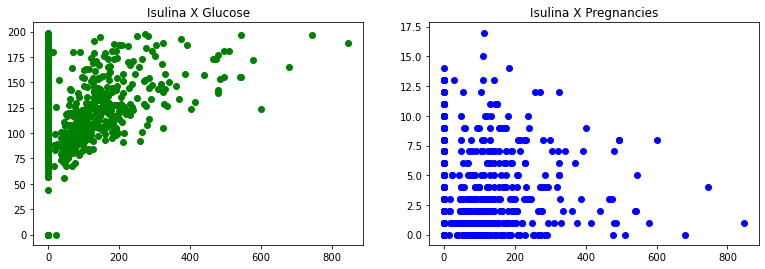

In [138]:
plt.figure(figsize=(13, 9))

plt.subplot(221)
Corr_isulina_Glucose = dados['Insulin'].corr(dados['Glucose'])
plt.title("Isulina X Glucose")
plt.scatter(dados['Insulin'],dados['Glucose'], color= 'green')
print('Correlação da Insulina com a Glucose: {0}'.format(Corr_isulina_Glucose))

plt.subplot(222)
Corr_isulina_Pregnancies = dados['Insulin'].corr(dados['Pregnancies'])
plt.title("Isulina X Pregnancies")
plt.scatter(dados['Insulin'],dados['Pregnancies'], color= 'blue')
print('Correlação da Insulina com Pregnancies: {0} '.format(Corr_isulina_Pregnancies))

plt.show()

Correlação da Insulina com a SkinThickness: 0.43678257012001387
Correlação da Insulina com a BloodPressure: 0.08893337837319315
Correlação da Insulina com a BMI: 0.19785905649310134
Correlação da Insulina com a DiabetesPedigreeFunction: 0.18507092916809934


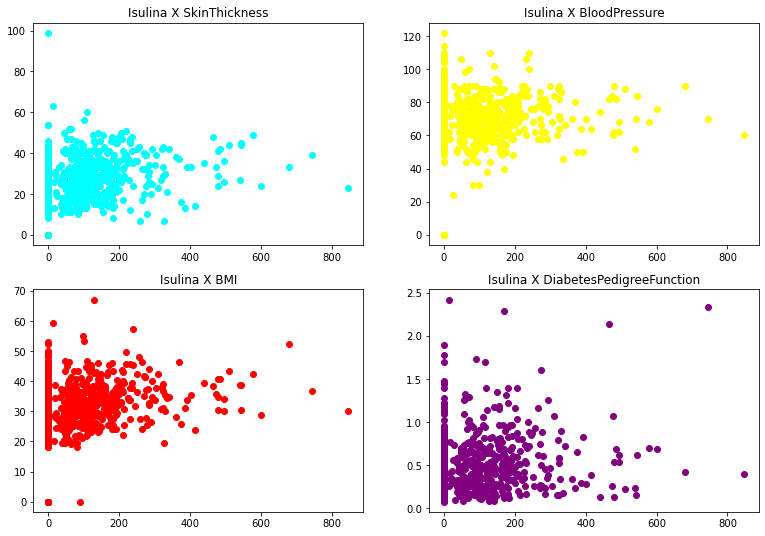

In [139]:
plt.figure(figsize=(13, 9))

plt.subplot(221)
Corr_isulina_SkinThickness= dados['Insulin'].corr(dados['SkinThickness'])
plt.title("Isulina X SkinThickness")
plt.scatter(dados['Insulin'],dados['SkinThickness'], color= 'cyan')
print('Correlação da Insulina com a SkinThickness: {0}'.format(Corr_isulina_SkinThickness))

plt.subplot(222)
Corr_isulina_BloodPressure= dados['Insulin'].corr(dados['BloodPressure'])
plt.title("Isulina X BloodPressure")
plt.scatter(dados['Insulin'],dados['BloodPressure'], color= 'yellow')
print('Correlação da Insulina com a BloodPressure: {0}'.format(Corr_isulina_BloodPressure))

plt.subplot(223)
Corr_isulina_BMI = dados['Insulin'].corr(dados['BMI'])
plt.title("Isulina X BMI")
plt.scatter(dados['Insulin'],dados['BMI'], color= 'red')
print('Correlação da Insulina com a BMI: {0}'.format(Corr_isulina_BMI))

plt.subplot(224)
Corr_isulina_DiabetesPedigreeFunction = dados['Insulin'].corr(dados['DiabetesPedigreeFunction'])
plt.title("Isulina X DiabetesPedigreeFunction")
plt.scatter(dados['Insulin'],dados['DiabetesPedigreeFunction'], color= 'purple')
print('Correlação da Insulina com a DiabetesPedigreeFunction: {0}'.format(Corr_isulina_DiabetesPedigreeFunction))

plt.show()

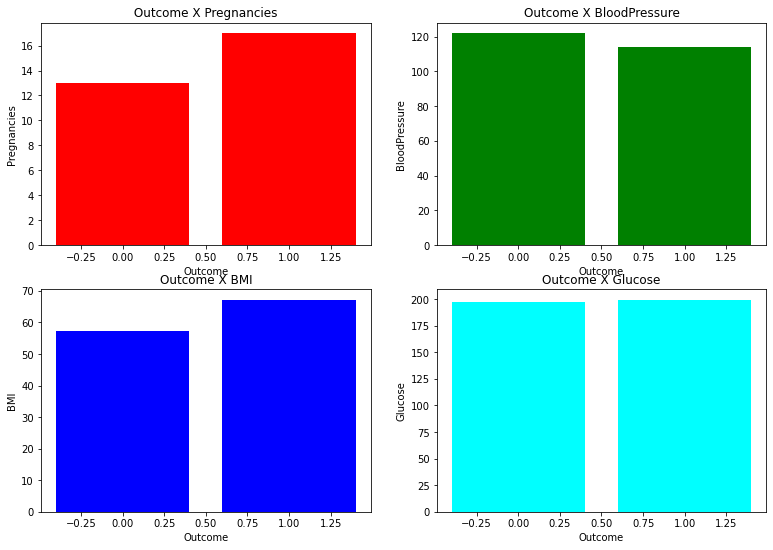

In [140]:
plt.figure(figsize=(13, 9))

plt.subplot(221) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.Pregnancies , color = 'red')
plt.ylabel("Pregnancies")
plt.xlabel("Outcome")
plt.title(" Outcome X Pregnancies ")


plt.subplot(222) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.BloodPressure , color = 'green')
plt.ylabel("BloodPressure")
plt.xlabel("Outcome")
plt.title("Outcome X BloodPressure")

plt.subplot(223) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.BMI , color = 'blue')
plt.ylabel("BMI")
plt.xlabel("Outcome")
plt.title("Outcome X BMI")

plt.subplot(224) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.Glucose , color = 'cyan')
plt.ylabel("Glucose")
plt.xlabel("Outcome")
plt.title("Outcome X Glucose")

plt.show()

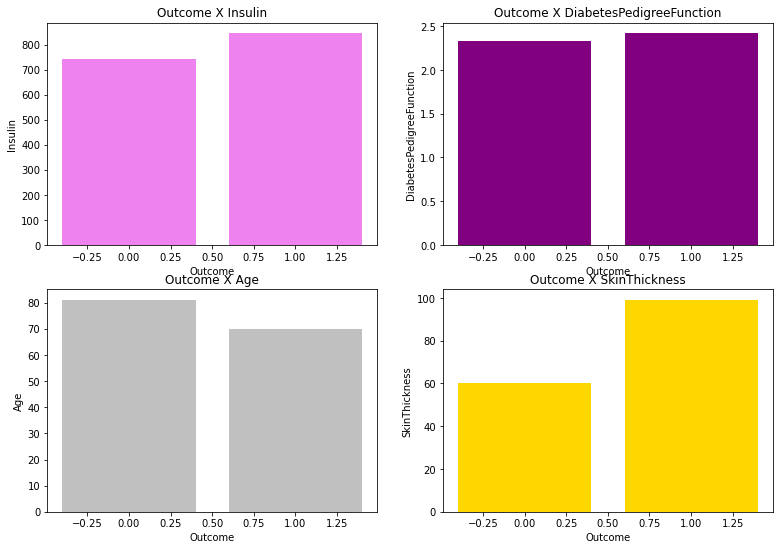

In [141]:
plt.figure(figsize=(13, 9))

plt.subplot(221) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.Insulin , color = 'violet')
plt.ylabel("Insulin")
plt.xlabel("Outcome")
plt.title("Outcome X Insulin")

plt.subplot(222) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.DiabetesPedigreeFunction , color = 'purple')
plt.ylabel("DiabetesPedigreeFunction")
plt.xlabel("Outcome")
plt.title("Outcome X DiabetesPedigreeFunction")

plt.subplot(223) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.Age , color = 'silver')
plt.ylabel("Age")
plt.xlabel("Outcome")
plt.title("Outcome X Age")

plt.subplot(224) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.bar(dados.Outcome,dados.SkinThickness , color = 'gold')
plt.ylabel("SkinThickness")
plt.xlabel("Outcome")
plt.title("Outcome X SkinThickness")


plt.show()

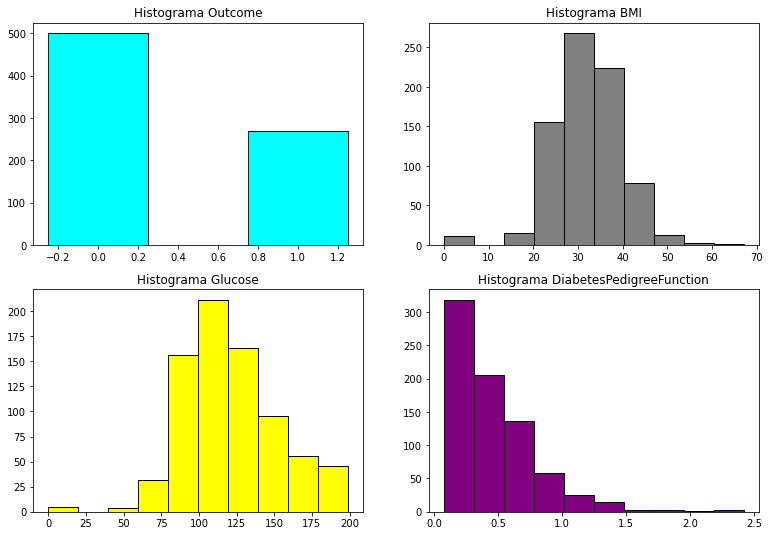

In [142]:
plt.figure(figsize=(13, 9))

plt.subplot(221) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.Outcome, bins=[-0.25,0.25,0.75,1.25], color='cyan', edgecolor='black')
plt.title("Histograma Outcome")

plt.subplot(222) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.BMI, color='gray', edgecolor='black')
plt.title("Histograma BMI")

plt.subplot(223) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.Glucose, color='yellow', edgecolor='black')
plt.title("Histograma Glucose")

plt.subplot(224) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.DiabetesPedigreeFunction, color='purple', edgecolor='black')
plt.title("Histograma DiabetesPedigreeFunction")

plt.show()

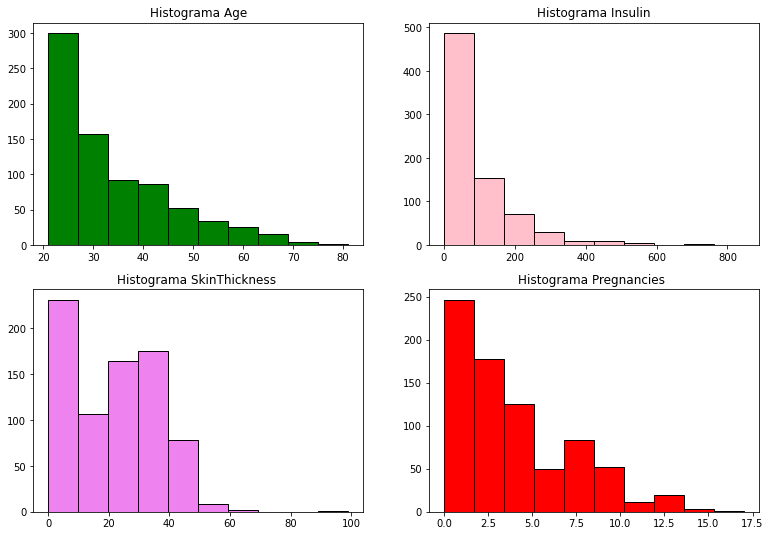

In [143]:
plt.figure(figsize=(13, 9))

plt.subplot(221) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.Age, color='green', edgecolor='black')
plt.title("Histograma Age")

plt.subplot(222) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.Insulin, color='pink', edgecolor='black')
plt.title("Histograma Insulin")

plt.subplot(223) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.SkinThickness , color='violet', edgecolor='black')
plt.title("Histograma SkinThickness ")

plt.subplot(224) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.Pregnancies , color='red', edgecolor='black')
plt.title("Histograma Pregnancies ")


plt.show()

In [144]:
plt.hist(dados.BloodPressure , color='darkcyan', edgecolor='black')
plt.title("Histograma BloodPressure ")
plt.show()

Pregnancies


Glucose


BloodPressure


SkinThickness


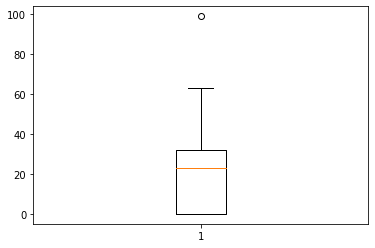

Insulin


BMI


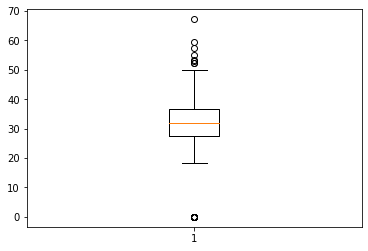

DiabetesPedigreeFunction


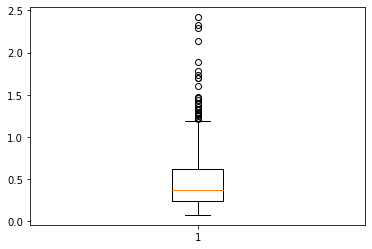

Age


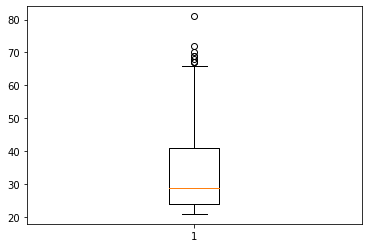

Outcome


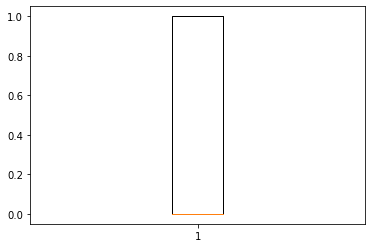

In [145]:
for x in dados:
    
    y = dados[x]
    fig, ax = plt.subplots()
    ax.boxplot(y)
    print(x)
    plt.show()

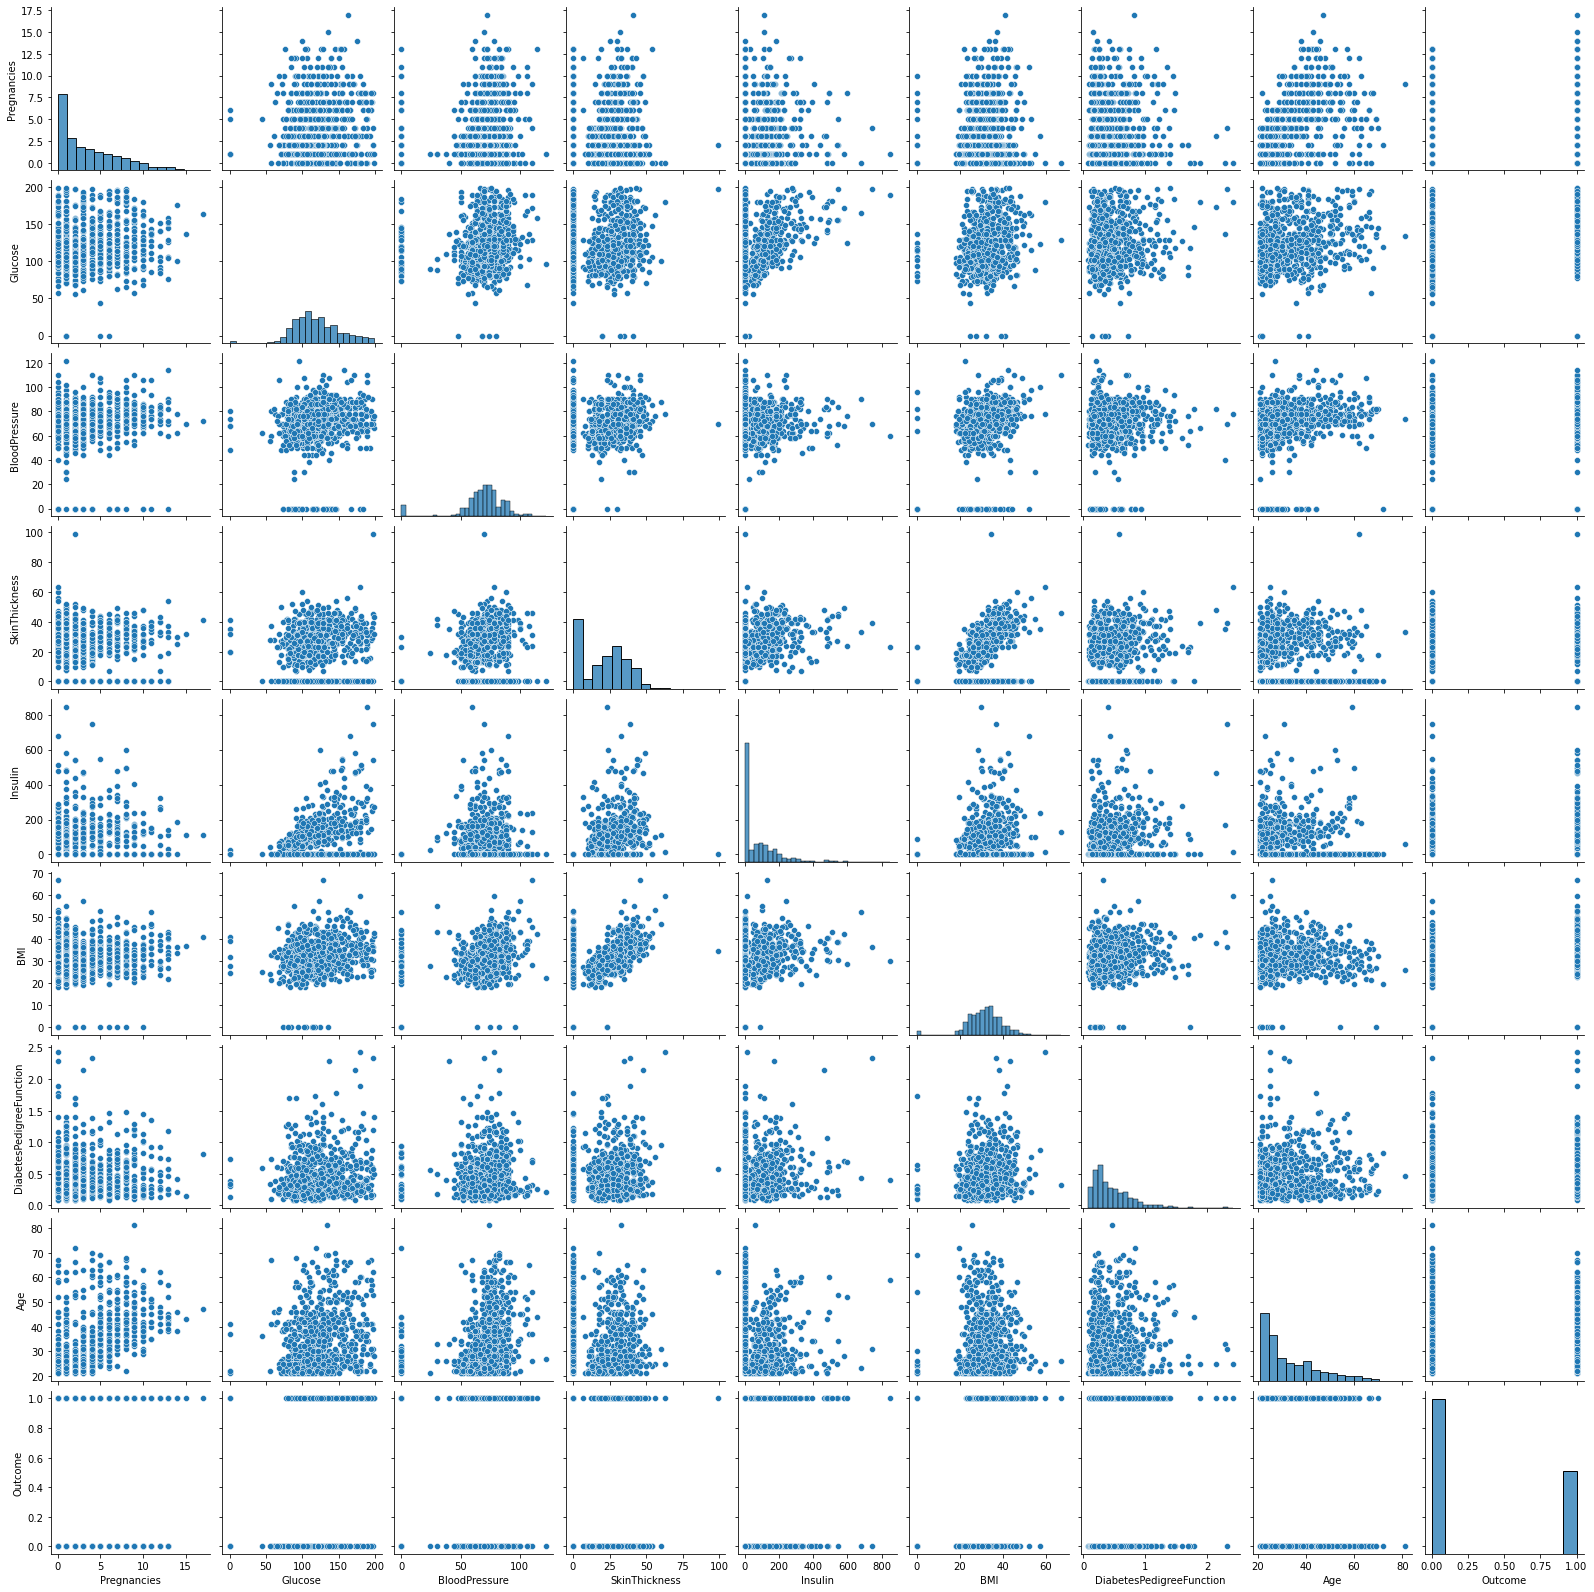

In [146]:
sns.pairplot(dados)

In [147]:
profile= ProfileReport(dados, title='pandas profiling report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]